In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('labeled_dataset_4_categories.csv')
df = df.rename(columns={'Semantic_Label_4': 'label'})
df['label_encoded'] = df['label'].astype('category').cat.codes
label_mapping = dict(enumerate(df['label'].astype('category').cat.categories))
print("Label Encoding:", label_mapping)

Label Encoding: {0: 'neutral', 1: 'oppose_ban', 2: 'support_ban', 3: 'unrelated'}


In [3]:
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['Text'])
y = df['label_encoded']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

In [5]:
dt_base = DecisionTreeClassifier(random_state=42)
dt_base.fit(X_train, y_train)
y_pred = dt_base.predict(X_test)

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print("\nDecision Tree Accuracy:", round(accuracy * 100, 2), "%")


Decision Tree Accuracy: 60.32 %


In [7]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_mapping.values()))


Classification Report:
              precision    recall  f1-score   support

     neutral       0.41      0.44      0.42       186
  oppose_ban       0.21      0.22      0.22        89
 support_ban       0.76      0.74      0.75       562
   unrelated       0.18      0.12      0.14        25

    accuracy                           0.60       862
   macro avg       0.39      0.38      0.38       862
weighted avg       0.61      0.60      0.61       862



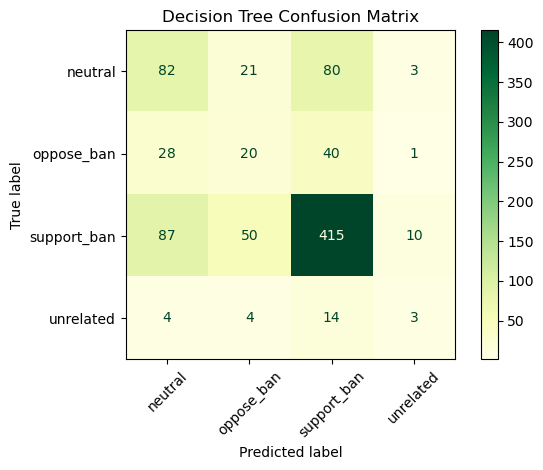

In [8]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_mapping.values())
disp.plot(cmap='YlGn')
plt.title("Decision Tree Confusion Matrix")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:

class_names = [label_mapping[i] for i in sorted(label_mapping.keys())]

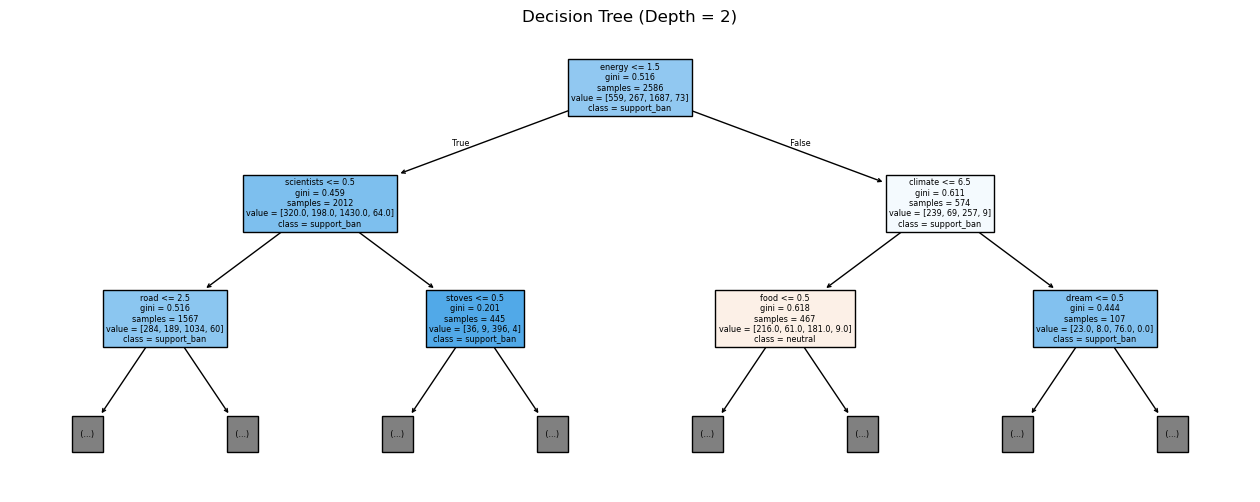

In [13]:
plt.figure(figsize=(16, 6))
plot_tree(dt_base, max_depth=2, feature_names=vectorizer.get_feature_names_out(),
          class_names=class_names, filled=True)
plt.title("Decision Tree (Depth = 2)")
plt.show()

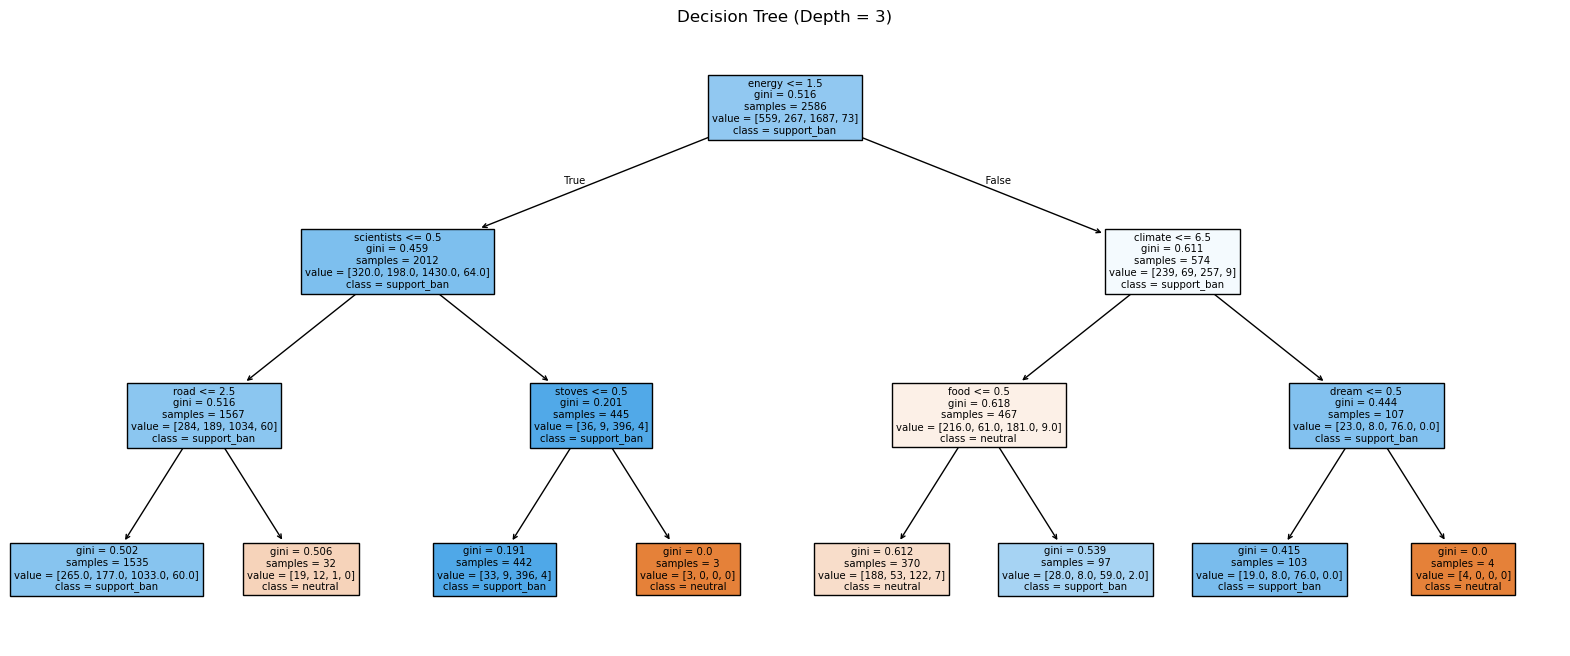

In [14]:
dt_depth3 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_depth3.fit(X_train, y_train)

plt.figure(figsize=(20, 8))
plot_tree(dt_depth3, feature_names=vectorizer.get_feature_names_out(),
          class_names=class_names, filled=True)
plt.title("Decision Tree (Depth = 3)")
plt.show()


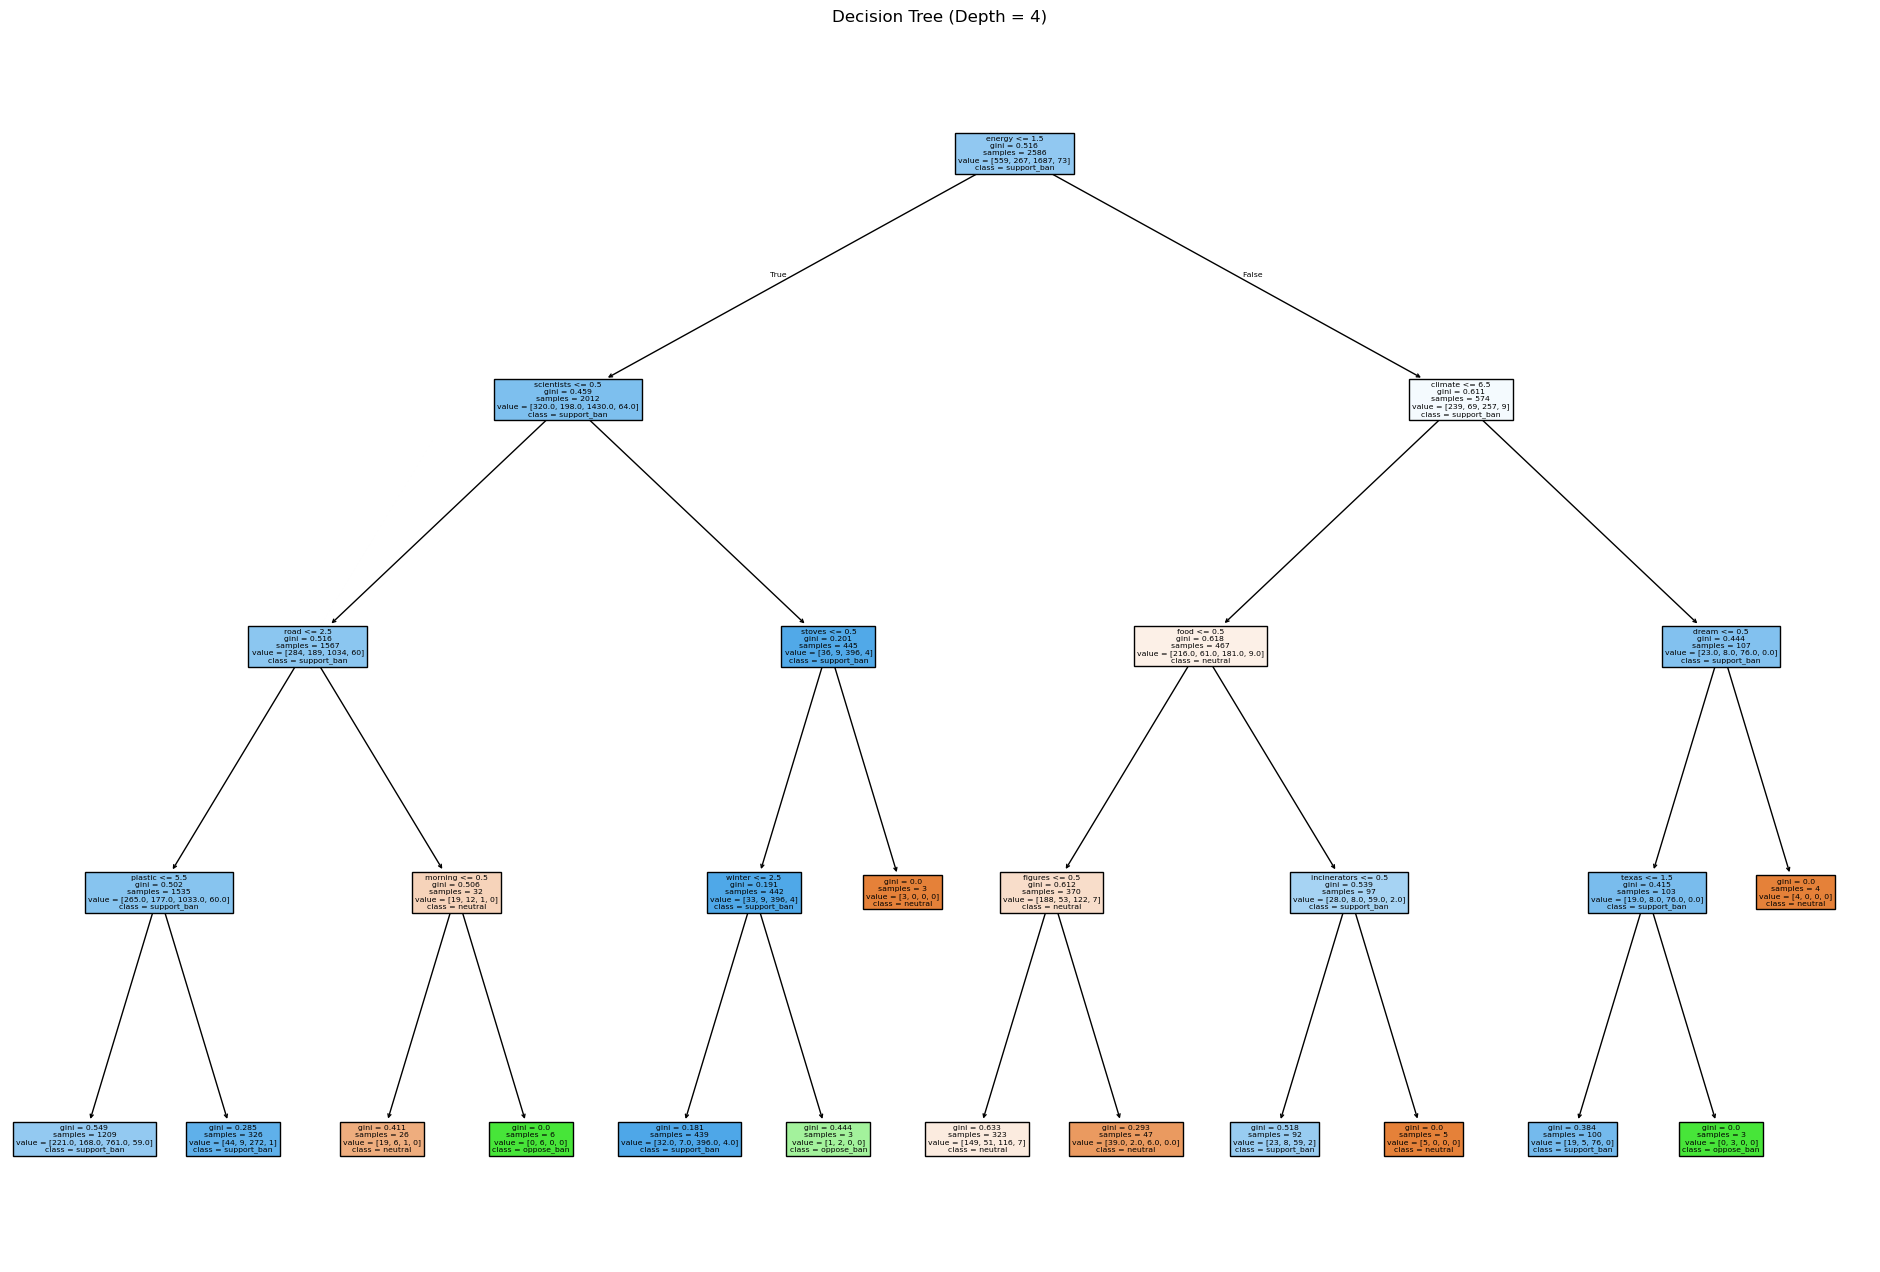

In [19]:
dt_depth4 = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_depth4.fit(X_train, y_train)

plt.figure(figsize=(24, 16))
plot_tree(dt_depth4, feature_names=vectorizer.get_feature_names_out(),
          class_names=class_names, filled=True)
plt.title("Decision Tree (Depth = 4)")
plt.show()

In [20]:
print("\nSample of original data (before preprocessing):\n")
print(df[['Text', 'label']].sample(5, random_state=42))

vectorized_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print("\nSample of vectorized data (after CountVectorizer):\n")
print(vectorized_df.sample(5, random_state=42))


Sample of original data (before preprocessing):

                                                   Text        label
2900  BP contingency plan for dealing with oil spill...  support_ban
51    ‘Back to plastic’: Trump pushes for plastic st...   oppose_ban
567   Vegan diet massively cuts environmental damage...      neutral
3268  Humans using resources of two planets, WWF war...      neutral
1987  Environmentalists sue EPA for reversing Obama-...  support_ban

Sample of vectorized data (after CountVectorizer):

      000  10  100  100bn  100km  100m  10m  10p  11  12  ...  yoghurt  york  \
2900    0   1    1      0      0     0    0    0   0   0  ...        0     0   
51      0   0    0      0      0     0    0    0   0   0  ...        0     0   
567     2   0    0      0      0     0    0    0   0   0  ...        0     0   
3268    0   0    0      0      0     0    0    0   0   1  ...        0     0   
1987    0   0    0      0      0     0    0    0   0   0  ...        0     0   

  